In [1]:
%load_ext autoreload
%autoreload 2
from dynairxvis import plot
from datetime import datetime

In [2]:
categories = ['Nominal 1', 'Nominal 2', 'Nominal 2', 'Nominal 3']
tasks = [
    (datetime(2015, 1, 1), datetime.now()),  # N 1
    (datetime(2017, 1, 1), datetime(2019, 6, 1)),  # N 2
    (datetime(2021, 7, 1), datetime.now()), # Continuation of N 2 (after a gap)
    (datetime(2023, 1, 1), datetime.now()),  # N 3
]
start_col, end_col = zip(*tasks)


In [3]:
# plot.gantt(categories,start_col, end_col, bar_colors=[2,4,8,6])

In [4]:
# from dynairxvis.time import line
# line(categories, start_dates=start_col, end_dates=end_col)

In [5]:
# plot.scatter(categories, start_dates=start_col, end_dates=end_col)

In [6]:
# plot.heatmap(categories, start_dates=start_col, end_dates=end_col, mode='gantt')

In [7]:
# categories = ['Category A', 'Category B', 'Category C']
# values = [10, 20, 30] # For 'scatter' mode

# plot.scatter(categories, values=values, mode='scatter')

In [8]:
# plot.scatter(categories, values=values, mode='bar')

In [9]:
# categories = ['Cat A', 'Cat B', 'Cat C']
# values = [10, [15, 20], 35]
# from dynairxvis.plot import heatmap
# heatmap(categories, values)

In [10]:
# from dynairxvis.pie import pie
# values = [1000, 300, 15000]
# categories = ['Project A', 'Project B', 'Project C']
# pie(categories, values)

In [11]:
# from dynairxvis.plot import pie
# import datetime
# categories = ['Project A', 'Project B', 'Project C', 'Project C']
# start_dates = [datetime.datetime(2020, 1, 1), datetime.datetime(2020, 5, 1), datetime.datetime(2020, 8, 1), datetime.datetime(2020, 1, 1)]
# end_dates = [datetime.datetime(2020, 3, 1), datetime.datetime(2020, 7, 1), datetime.datetime(2020, 12, 1), datetime.datetime(2020, 3, 1)]
# pie(categories, time=True, start_dates=start_dates, end_dates=end_dates)

## Evaluation Charts 
These charts are based on the N, Q etc combinations for conditions, medications and investigation data type combinations.

In [12]:
# Example DataFrame
from dynairxvis.utils import profile
from dynairxvis.plot import plot_charts
import pandas as pd
df = pd.DataFrame({
    'Blood_Pressure': [120, 130, 125, 140, 140],
    'Condition': ['Diabetes', 'Hypertension', 'Asthma', 'COPD', 'Asthma'],
    'Start_Date': pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-06', '2022-01-06']),
    'End_Date': pd.to_datetime(['2021-06-01', '2021-02-02', '2021-08-03', '2021-10-04', '2022-06-06']),
    'Pain_Scale': pd.Categorical(['low', 'high', 'medium', 'extreme', 'high'], ordered=True)
})
print(profile(df, 5))


({'Blood_Pressure': 'Q', 'Condition': 'N', 'Start_Date': 'T', 'End_Date': 'T', 'Pain_Scale': 'O'}, 'NOQTT', ['No appropriate chart found'])


In [13]:
# from dynairxvis.time import grouped_chart
# grouped_chart(df['Condition'], df['Start_Date'], df['End_Date'], values=[1,3,1])

Q ['Blood_Pressure']
Q charts for Blood_Pressure...


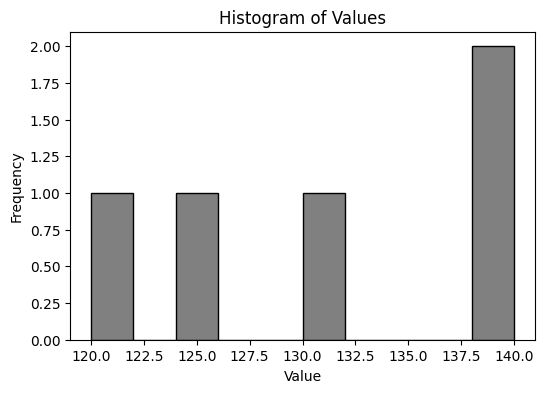

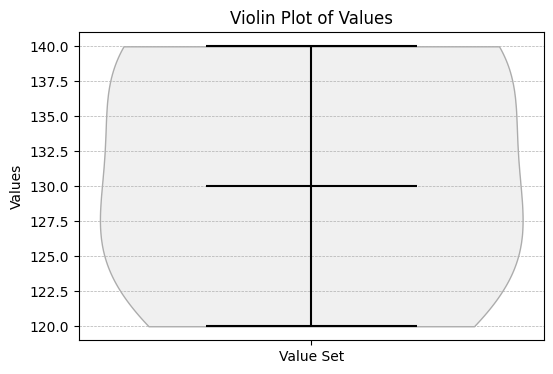

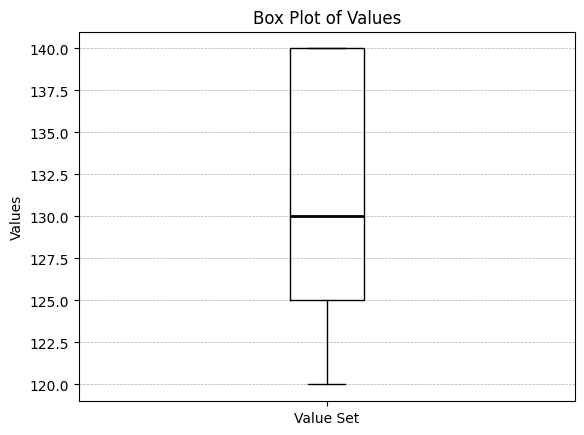

In [14]:
############################## Q
plot_charts(df, column_refs=['Blood_Pressure'])
# four chart types, dot dropped, three shown

N ['Condition']
N charts...


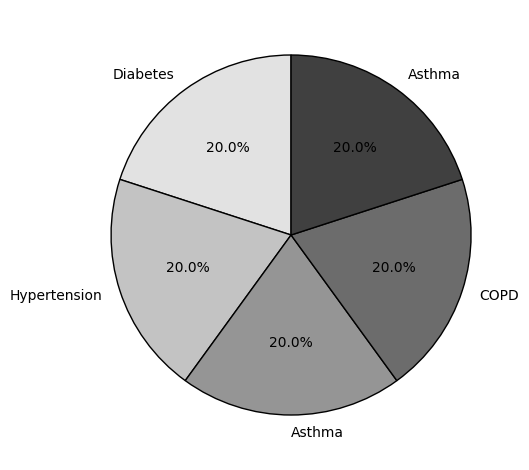

Condition
Diabetes    
Hypertension
Asthma      
COPD        
Asthma      


In [15]:
############################## N
plot_charts(df, column_refs=['Condition'])
# three chart types, one dropped, two shown

NQ ['Blood_Pressure', 'Condition']
NQ charts...


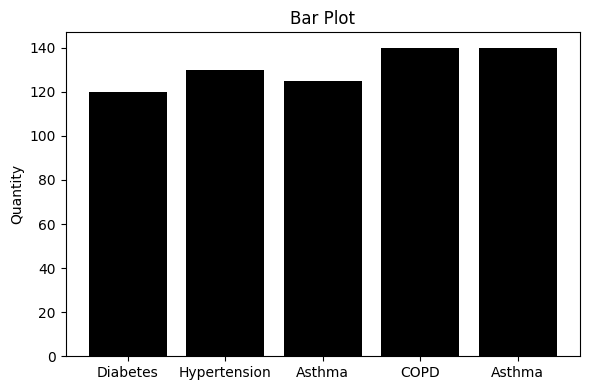

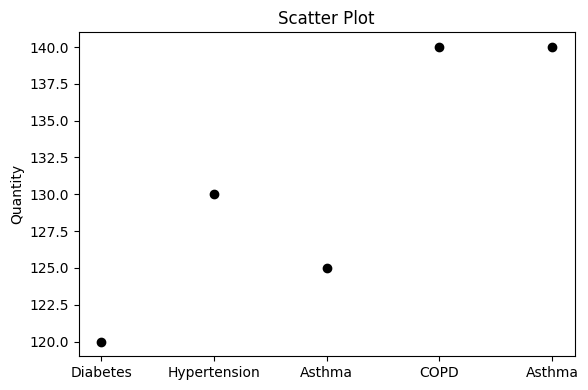

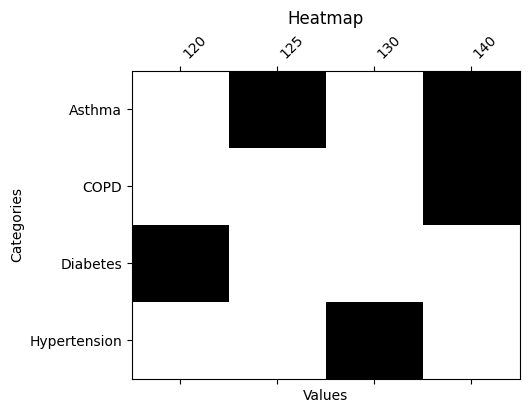

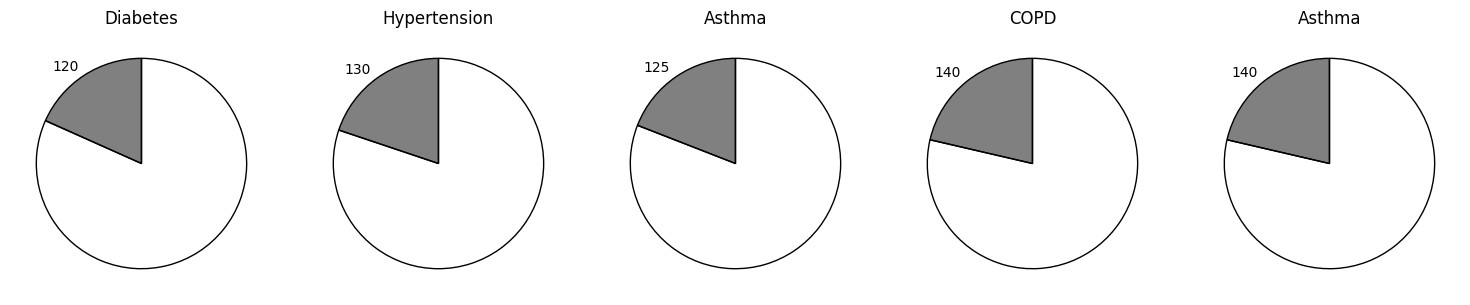

,Blood_Pressure,Condition
0,120,Diabetes
1,130,Hypertension
2,125,Asthma
3,140,COPD
4,140,Asthma


In [16]:
############################## NQ
plot_charts(df, column_refs=['Blood_Pressure', 'Condition'])
display(df[['Blood_Pressure', 'Condition']])
# 7 charts, radar and pie dropped five remaining which are shown

NTT ['Start_Date', 'End_Date', 'Condition']
NT charts...


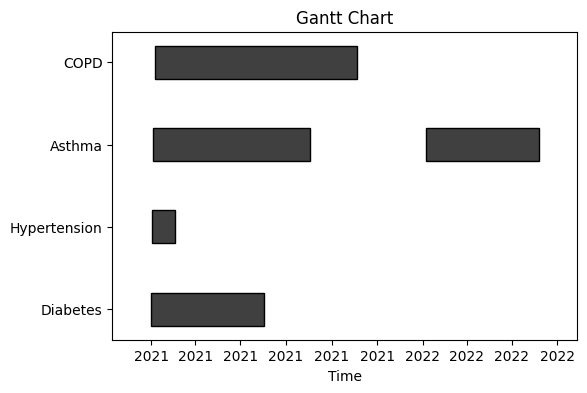

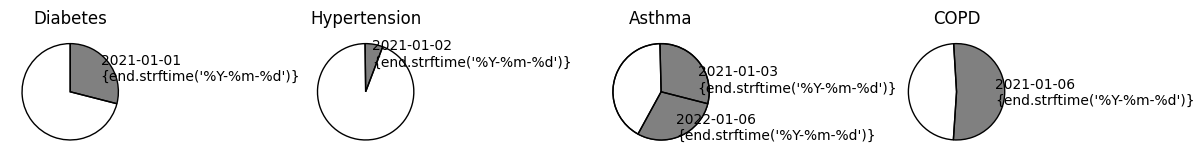

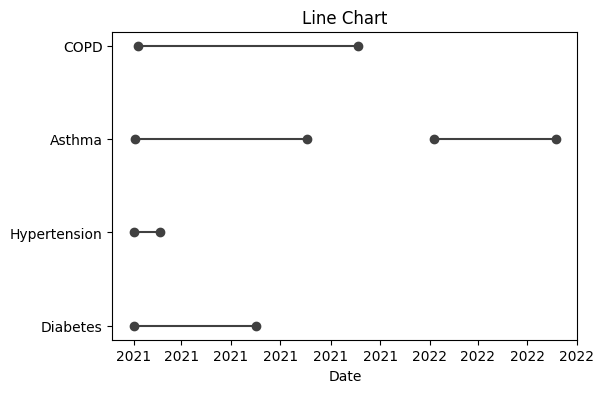

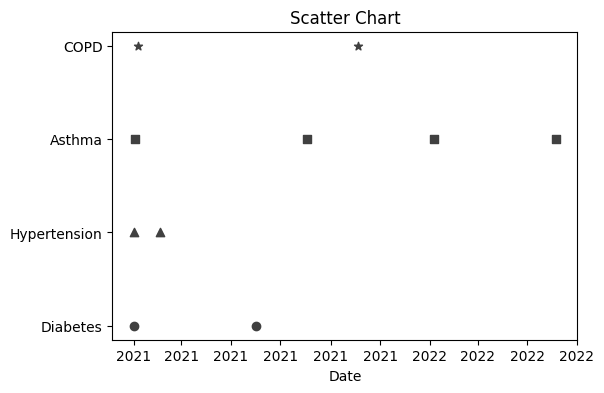

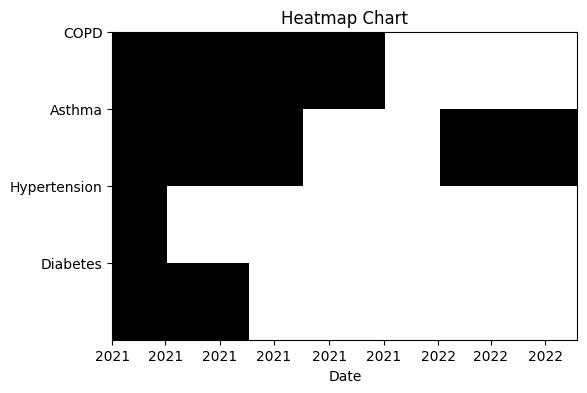

In [17]:
############################## NT
plot_charts(df, column_refs=['Start_Date', 'End_Date', 'Condition'])
# six charts, donut dropped, five shown

Index(['Blood_Pressure', 'Condition', 'Start_Date', 'End_Date', 'Pain_Scale'], dtype='object')
NOTT ['Start_Date', 'End_Date', 'Pain_Scale', 'Condition']
NTO charts...


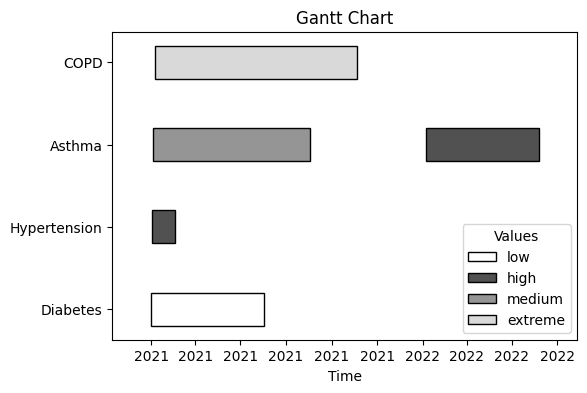

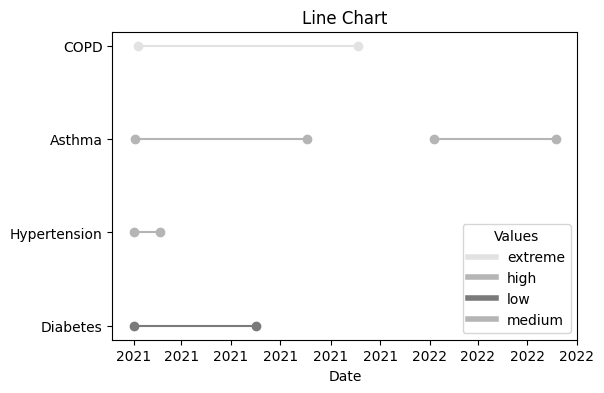

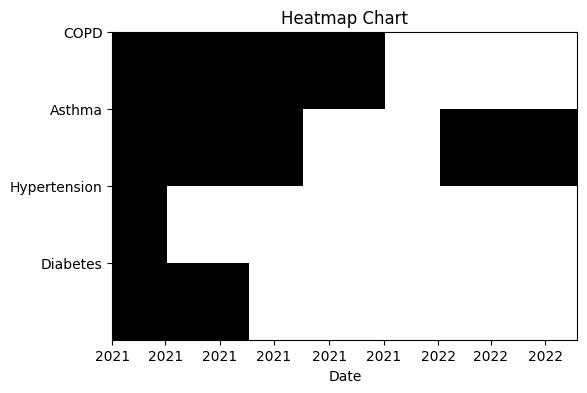

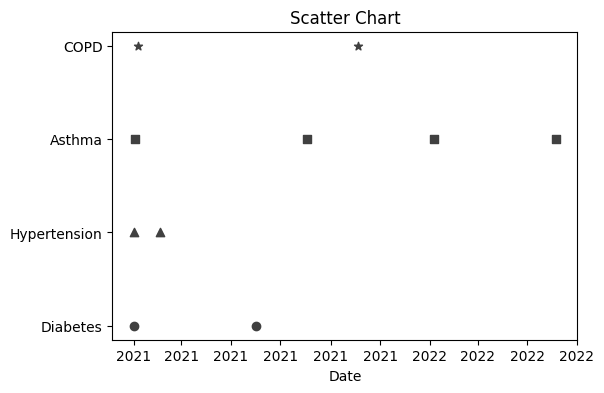

In [18]:
############################## NOT
print(df.columns)
plot_charts(df, column_refs=['Start_Date', 'End_Date', 'Pain_Scale', 'Condition'])

NQTT ['Start_Date', 'End_Date', 'Blood_Pressure', 'Condition']
NQT charts...


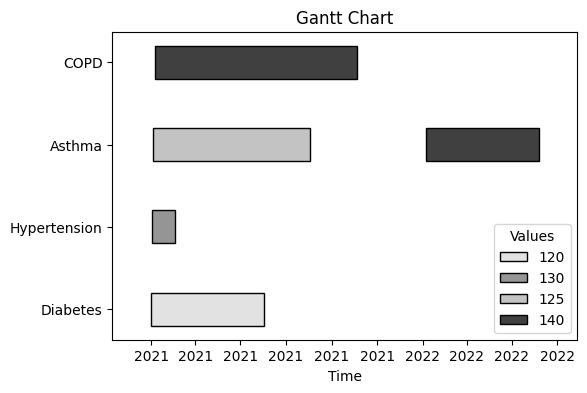

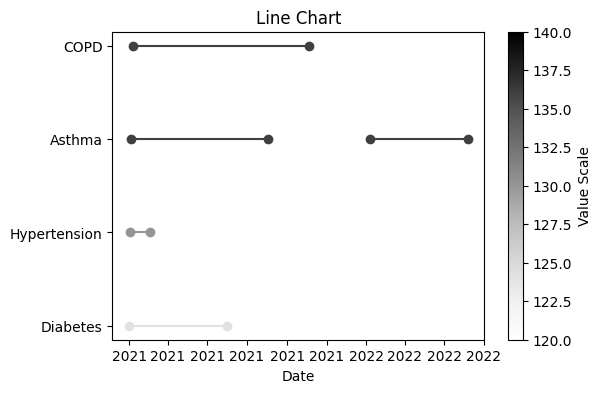

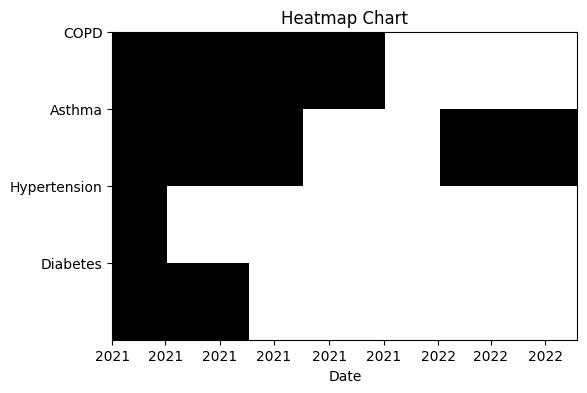

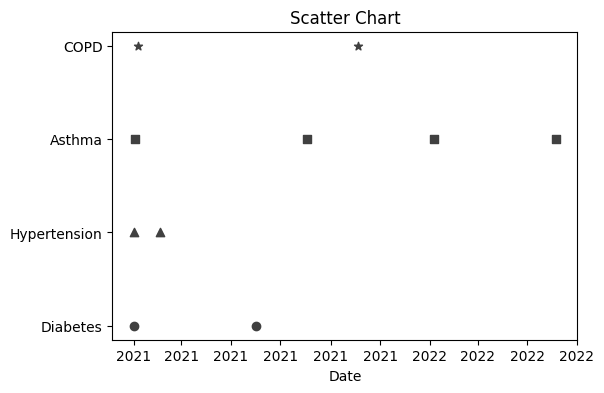

In [19]:
############################## NQT
plot_charts(df, column_refs=['Start_Date', 'End_Date', 'Blood_Pressure', 'Condition'])

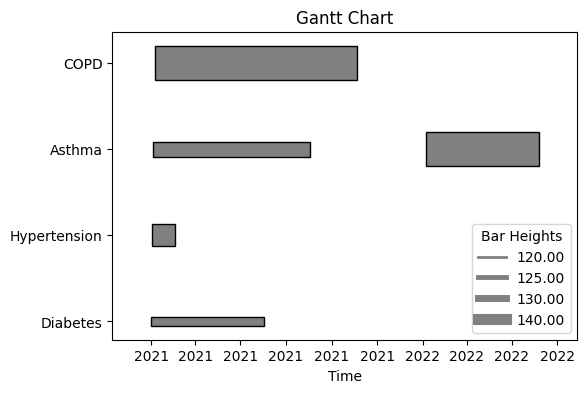

In [20]:
# lets try NQTT but set height of the bars with the "values"
plot.gantt(df['Condition'], time=True, 
           start_dates=df['Start_Date'], end_dates=df['End_Date'], 
           values=df['Blood_Pressure'], use_values_as_height=True)

## Plot Grid
Multiple plots sharing a "time" axis.

In [21]:
df = pd.DataFrame({
    'Blood_Pressure': [120, 130, 125, 140, 140],
    'Condition': ['Diabetes', 'Hypertension', 'Asthma', 'COPD', 'Asthma'],
    'Start_Date': pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03', '2022-01-06', '2024-01-06']),
    'End_Date': pd.to_datetime(['2021-06-01', '2021-02-02', '2022-08-03', '2022-10-04', '2024-12-06']),
    'Pain_Scale': pd.Categorical(['low', 'high', 'medium', 'extreme', 'high'], ordered=True)
})
df2 = pd.DataFrame({
    'Medication': ['Metformin', 'Lisinopril', 'Salbutamol', 'Atorvastatin', 'Prednisone'],
    'Start_Date': pd.to_datetime(['2021-01-05', '2021-02-01', '2022-04-01', '2023-06-15', '2024-01-10']),
    'End_Date': pd.to_datetime(['2021-07-05', '2021-03-01', '2022-09-01', '2023-12-15', '2024-07-10']),
    'Dosage': [500, 10, 2, 20, 50]
})
df3 = pd.DataFrame({
    'Specialist': ['Cardiologist', 'Endocrinologist', 'Pulmonologist', 'Neurologist', 'Orthopedist', 'Orthopedist'],
    'Start_Date': pd.to_datetime(['2020-03-15', '2021-04-10', '2021-05-25', '2021-08-01', '2022-02-20', '2023-02-20']),
    'End_Date': pd.to_datetime(['2020-03-15', '2021-04-10', '2021-05-25', '2021-08-01', '2022-02-20', '2023-02-20']),
    'Visit_Type': ['Follow-up', 'Initial', 'Check-up', 'Consultation', 'Surgery', 'Surgery']
})


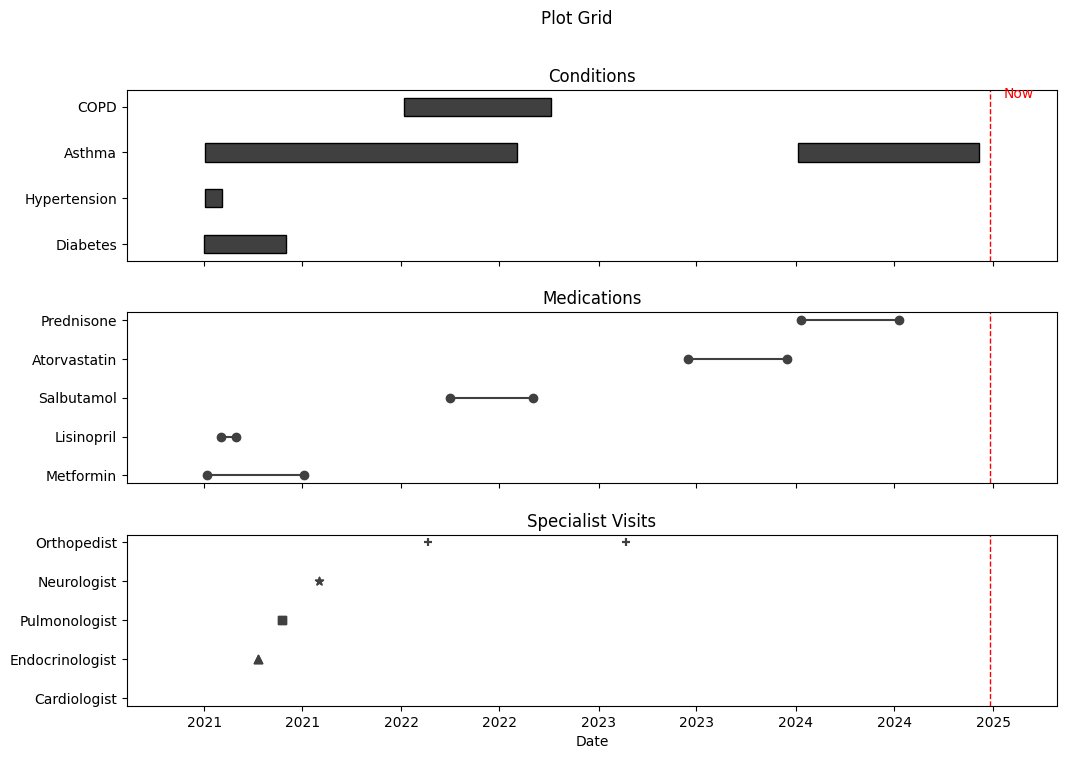

In [22]:
from dynairxvis.plotgrid import plot_grid
plot_grid(
    categories_list=[df['Condition'], df2['Medication'], df3['Specialist']],
    start_dates_list=[df['Start_Date'], df2['Start_Date'], df3['Start_Date']],
    end_dates_list=[df['End_Date'], df2['End_Date'], df3['End_Date']],
    titles_list=['Conditions', 'Medications', 'Specialist Visits'],
    chart_types=['gantt', 'line', 'scatter'],
    fig_kw={'figsize': (12, 8)},
)

# from dynairxvis.time import grouped_chart
# grouped_chart(df['Condition'], df['Start_Date'], df['End_Date'])